In [1]:
# Load modules

import xarray as xr
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import zarr
import gcsfs
from scipy.interpolate import griddata
from xmip.preprocessing import rename_cmip6
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib import gridspec
import matplotlib
import cartopy as cart

# Load omega, land mask, and PRW

In [6]:
omega_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_wap_37model_piControl_2x2_last250.nc')

omega_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_wap_34model_historical_2x2_last250.nc')

#tas_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_tas_piControl_2x2_48mod_last250.nc')

land_mask = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_landmask_31model.nc')

prw_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_prw_33model_piControl_2x2_last250.nc')

prw_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_prw_35model_historical_2x2.nc')

In [3]:
models = ['ACCESS-CM2','BCC-CSM2-MR','BCC-ESM1','CAMS-CSM1-0','CanESM5','CESM2','CESM2-FV2','CESM2-WACCM',
          'CESM2-WACCM-FV2','EC-Earth3','EC-Earth3-Veg-LR','FGOALS-g3','GFDL-CM4','GFDL-ESM4','GISS-E2-1-G',
          'INM-CM4-8','INM-CM5-0','MIROC6','MPI-ESM1-2-LR','MRI-ESM2-0',
          'NorCPM1','NorESM2-MM','SAM0-UNICON','TaiESM1']

In [4]:
mask = land_mask.mean('name')

In [5]:
omega_cont_mean = omega_cont.isel(time=slice(len(omega_cont.time)-(30*12),
                                             len(omega_cont.time))).sel(lat=slice(-60,60)).mean('time')
omega_cont_trunc = omega_cont_mean.where(mask<50).sel(name=models).mean('name')

#omega_cont_trunc = omega_cont_mean.sel(name=models).mean('name')

In [6]:
omega_hist_mean = omega_hist.isel(time=slice(len(omega_hist.time)-(30*12),
                                             len(omega_hist.time))).sel(lat=slice(-60,60)).mean('time')
omega_hist_trunc = omega_hist_mean.where(mask<50).sel(name=models).mean('name')

#omega_hist_trunc = omega_hist_mean.sel(name=models).mean('name')

In [7]:
prw_cont_mean = prw_cont.isel(time=slice(len(prw_cont.time)-(30*12),
                                         len(prw_cont.time))).sel(lat=slice(-60,60)).mean('time')
prw_cont_trunc = prw_cont_mean.where(mask<50).sel(name=models).mean('name')

#prw_cont_trunc = prw_cont_mean.sel(name=models).mean('name')

In [8]:
prw_hist_mean = prw_hist.isel(time=slice(len(prw_hist.time)-(30*12),
                                         len(prw_hist.time))).sel(lat=slice(-60,60)).mean('time')
prw_hist_trunc = prw_hist_mean.where(mask<50).sel(name=models).mean('name')

#prw_hist_trunc = prw_hist_mean.sel(name=models).mean('name')

# Load TAS cont

In [5]:
tas_cont_rolling = tas_cont.sel(name=models).rolling(time=120, center=True).mean('time')
tas_cont_std = tas_cont_rolling.std('time')
tas_cont_var = tas_cont_std.mean('name')

In [6]:
tas_cont_var.to_netcdf('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_tas_prwanalysis_subset_var.nc')

In [8]:
tas_cont_var = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_tas_prwanalysis_subset_var.nc')

#tas_cont_var = tas_cont_var.where(mask<50).sel(lat=slice(-60,60))

tas_cont_var = tas_cont_var.sel(lat=slice(-60,60))

# Load TAS hist

In [4]:
tas_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_tas_43mod_historical_2x2.nc')
tas_hist_rolling = tas_hist.sel(name=models).rolling(time=120, center=True).mean('time')
tas_hist_std = tas_hist_rolling.std('time')
tas_hist_var = tas_hist_std.mean('name')
tas_hist_var

<xarray.DataArray 'tas' (lat: 88, lon: 179)>
array([[0.42389386, 0.43219494, 0.43382626, ..., 0.42799454, 0.42996597,
        0.43196293],
       [0.42646117, 0.43889639, 0.44037538, ..., 0.42892163, 0.43098802,
        0.43257333],
       [0.43028413, 0.43904704, 0.44047235, ..., 0.43397253, 0.43260888,
        0.43364124],
       ...,
       [0.82457161, 0.82702454, 0.83783549, ..., 0.77027907, 0.78183947,
        0.79338976],
       [0.78318012, 0.77836041, 0.7816883 , ..., 0.75824725, 0.76246813,
        0.76681828],
       [0.75624249, 0.74964697, 0.75085805, ..., 0.74297775, 0.74441097,
        0.74589493]])
Coordinates:
    height   float64 ...
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [5]:
tas_hist_var.to_netcdf('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_tas_hist_prwanalysis_subset_var.nc')

In [9]:
tas_hist_var = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_tas_hist_prwanalysis_subset_var.nc')

#tas_hist_var = tas_hist_var.where(mask<50).sel(lat=slice(-60,60))

tas_hist_var = tas_hist_var.sel(lat=slice(-60,60))

# TAS Percentage

In [17]:
tas_diff_var = tas_hist_var - tas_cont_var
tas_percent_var = tas_diff_var*100/tas_cont_var

# Plot TAS vs. PRW and omega

10740


Text(0.67, 0.9, 'PRW')

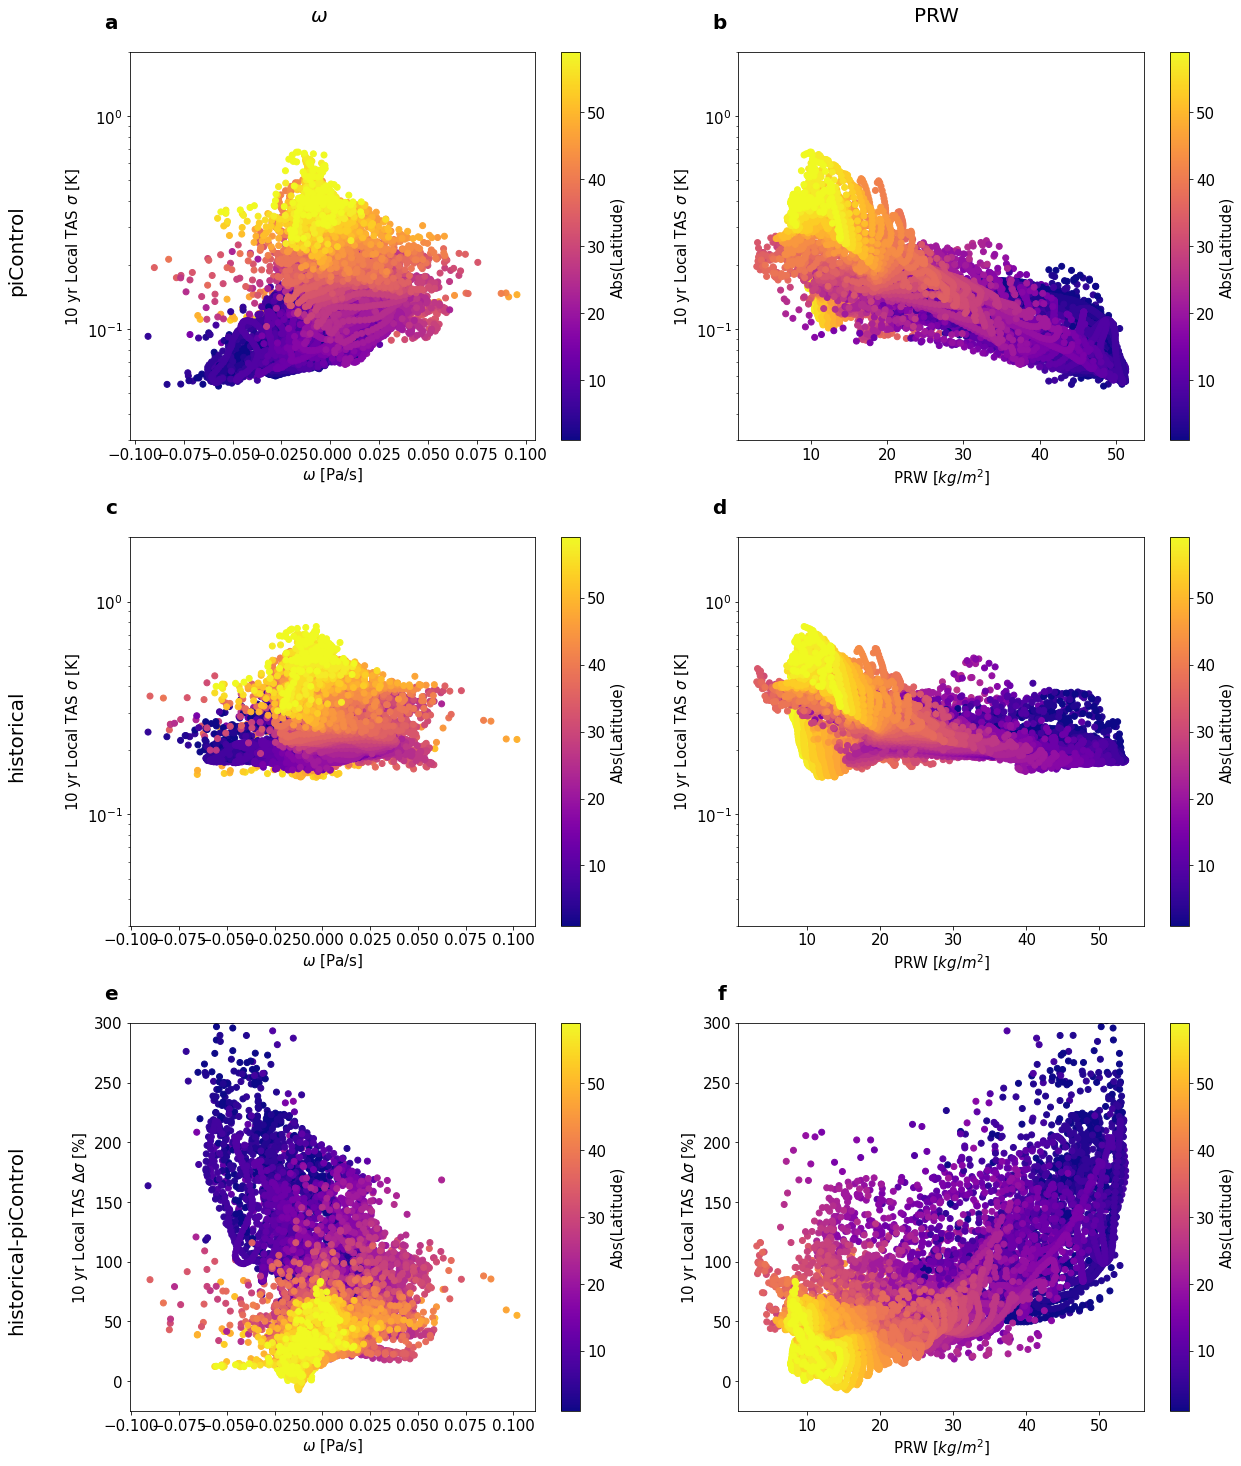

In [36]:
colored_lats = []
for latitude in tas_cont_var['lat'].values:
    for i in range(179): #length of longitude
       colored_lats.append(abs(latitude))
print(len(colored_lats))


fig = plt.figure(figsize=(20,25))
gs = gridspec.GridSpec(ncols=2, nrows=3)
gs.update(wspace=0.2,hspace=0.25)
#top=300
#bottom=270
font = {'size'   : 15,
        'weight' : 'normal'}

matplotlib.rc('font', **font)


ax1 = fig.add_subplot(gs[0,0])
scatter_cont_omega = ax1.scatter(omega_cont_trunc,tas_cont_var,c=colored_lats,cmap='plasma')
cbar = plt.colorbar(scatter_cont_omega, ax=ax1)
cbar.ax.set_ylabel('Abs(Latitude)')
#plt.title(r'piControl TS $\sigma$ vs. piControl $\omega$ - (N=33)')
plt.xlabel(r'$\omega$ [Pa/s]')
plt.ylim(0.03, 2)
plt.yscale('log')
plt.ylabel(r'10 yr Local TAS $\sigma$ [K]')
ax1.text(-0.03, 1.1, 'a', transform=ax1.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

ax2 = fig.add_subplot(gs[0,1])
scatter_cont_prw = ax2.scatter(prw_cont_trunc,tas_cont_var,c=colored_lats,cmap='plasma')
cbar = plt.colorbar(scatter_cont_prw, ax=ax2)
cbar.ax.set_ylabel('Abs(Latitude)')
#plt.title(r'piControl TS $\sigma$ vs. piControl $\omega$ - (N=33)')
plt.xlabel(r'PRW [$kg/m^2$]')
plt.ylim(0.03, 2)
plt.yscale('log')
plt.ylabel(r'10 yr Local TAS $\sigma$ [K]')
ax2.text(-0.03, 1.1, 'b', transform=ax2.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

fig.text(0.04, 0.77, 'piControl', va='center', rotation='vertical', fontsize=20)

ax3 = fig.add_subplot(gs[1,0])
scatter_hist_omega = ax3.scatter(omega_hist_trunc,tas_hist_var,c=colored_lats,cmap='plasma')
cbar = plt.colorbar(scatter_hist_omega, ax=ax3)
cbar.ax.set_ylabel('Abs(Latitude)')
#plt.title(r'piControl TS $\sigma$ vs. piControl $\omega$ - (N=33)')
plt.xlabel(r'$\omega$ [Pa/s]')
plt.ylim(0.03, 2)
plt.yscale('log')
plt.ylabel(r'10 yr Local TAS $\sigma$ [K]')
ax3.text(-0.03, 1.1, 'c', transform=ax3.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

ax4 = fig.add_subplot(gs[1,1])
scatter_hist_prw = ax4.scatter(prw_hist_trunc,tas_hist_var,c=colored_lats,cmap='plasma')
cbar = plt.colorbar(scatter_hist_prw, ax=ax4)
cbar.ax.set_ylabel('Abs(Latitude)')
#plt.title(r'piControl TS $\sigma$ vs. piControl $\omega$ - (N=33)')
plt.xlabel(r'PRW [$kg/m^2$]')
plt.ylim(0.03, 2)
plt.yscale('log')
plt.ylabel(r'10 yr Local TAS $\sigma$ [K]')
ax4.text(-0.03, 1.1, 'd', transform=ax4.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

fig.text(0.04, 0.5, 'historical', va='center', rotation='vertical', fontsize=20)

ax5 = fig.add_subplot(gs[2,0])
scatter_perc_omega = ax5.scatter(omega_hist_trunc,tas_percent_var,c=colored_lats,cmap='plasma')
cbar = plt.colorbar(scatter_perc_omega, ax=ax5)
cbar.ax.set_ylabel('Abs(Latitude)')
#plt.title(r'piControl TS $\sigma$ vs. piControl $\omega$ - (N=33)')
plt.xlabel(r'$\omega$ [Pa/s]')
plt.ylim(-25,300)
plt.ylabel(r'10 yr Local TAS $\Delta \sigma$ [%]')
ax5.text(-0.03, 1.1, 'e', transform=ax5.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

ax6 = fig.add_subplot(gs[2,1])
scatter_perc_omega = ax6.scatter(prw_hist_trunc,tas_percent_var,c=colored_lats,cmap='plasma')
cbar = plt.colorbar(scatter_perc_omega, ax=ax6)
cbar.ax.set_ylabel('Abs(Latitude)')
#plt.title(r'piControl TS $\sigma$ vs. piControl $\omega$ - (N=33)')
plt.xlabel(r'PRW [$kg/m^2$]')
plt.ylim(-25,300)
plt.ylabel(r'10 yr Local TAS $\Delta \sigma$ [%]')
ax6.text(-0.03, 1.1, 'f', transform=ax6.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

fig.text(0.04, 0.22, 'historical-piControl', va='center', rotation='vertical', fontsize=20)

fig.text(0.25, 0.9, r'$\omega$', va='center', fontsize=20)
fig.text(0.67, 0.9, 'PRW', va='center', fontsize=20)

# Load TS control

In [4]:
ts_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_ts_39model_piControl_2x2_last250.nc')
ts_cont_rolling = ts_cont.sel(name=models).rolling(time=120, center=True).mean('time')
ts_cont_std = ts_cont_rolling.std('time')
ts_cont_var = ts_cont_std.mean('name')
ts_cont_var

<xarray.DataArray 'ts' (lat: 88, lon: 179)>
array([[0.2872652 , 0.29191835, 0.29163151, ..., 0.28994183, 0.29091788,
        0.29170079],
       [0.29987644, 0.30880522, 0.30953449, ..., 0.30130489, 0.3036829 ,
        0.3046442 ],
       [0.31576948, 0.31907772, 0.31727278, ..., 0.32080049, 0.3211587 ,
        0.3200934 ],
       ...,
       [0.56558509, 0.57937081, 0.59455997, ..., 0.49973524, 0.51491834,
        0.53078452],
       [0.50674279, 0.50865867, 0.51464672, ..., 0.47531746, 0.48249316,
        0.48953255],
       [0.46747489, 0.46635072, 0.46902279, ..., 0.45368634, 0.45648928,
        0.45887478]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [5]:
ts_cont_var.to_netcdf('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_ts_cont_prwanalysis_subset_var.nc')

In [10]:
ts_cont_var = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_ts_cont_prwanalysis_subset_var.nc')
ts_cont_var = ts_cont_var.where(mask<50).sel(lat=slice(-60,60))

# Load TS Hist

In [3]:
ts_hist = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_ts_38model_historical_2x2.nc')
ts_hist_rolling = ts_hist.sel(name=models).rolling(time=120, center=True).mean('time')
ts_hist_std = ts_hist_rolling.std('time')
ts_hist_var = ts_hist_std.mean('name')
ts_hist_var

<xarray.DataArray 'ts' (lat: 88, lon: 179)>
array([[0.43571493, 0.44459201, 0.44729462, ..., 0.43949863, 0.44193618,
        0.44407066],
       [0.43851518, 0.45149506, 0.45373105, ..., 0.44116077, 0.44362462,
        0.44489627],
       [0.44155819, 0.45165042, 0.45304103, ..., 0.44483264, 0.44273647,
        0.44428273],
       ...,
       [0.8536801 , 0.85704805, 0.86875374, ..., 0.80101786, 0.81140001,
        0.82235994],
       [0.81337132, 0.80771435, 0.8108994 , ..., 0.78839719, 0.79245658,
        0.79670861],
       [0.78576043, 0.77855786, 0.77959274, ..., 0.77288395, 0.77402632,
        0.77523966]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [4]:
ts_hist_var.to_netcdf('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_ts_hist_prwanalysis_subset_var.nc')

In [11]:
ts_hist_var = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_ts_hist_prwanalysis_subset_var.nc')
ts_hist_var = ts_hist_var.where(mask<50).sel(lat=slice(-60,60))

# TS Percentage

In [12]:
ts_diff_var = ts_hist_var - ts_cont_var
ts_percent_var = ts_diff_var*100/ts_cont_var

# Plot TS vs. PRW and Omega

10740


Text(0.67, 0.9, 'PRW')

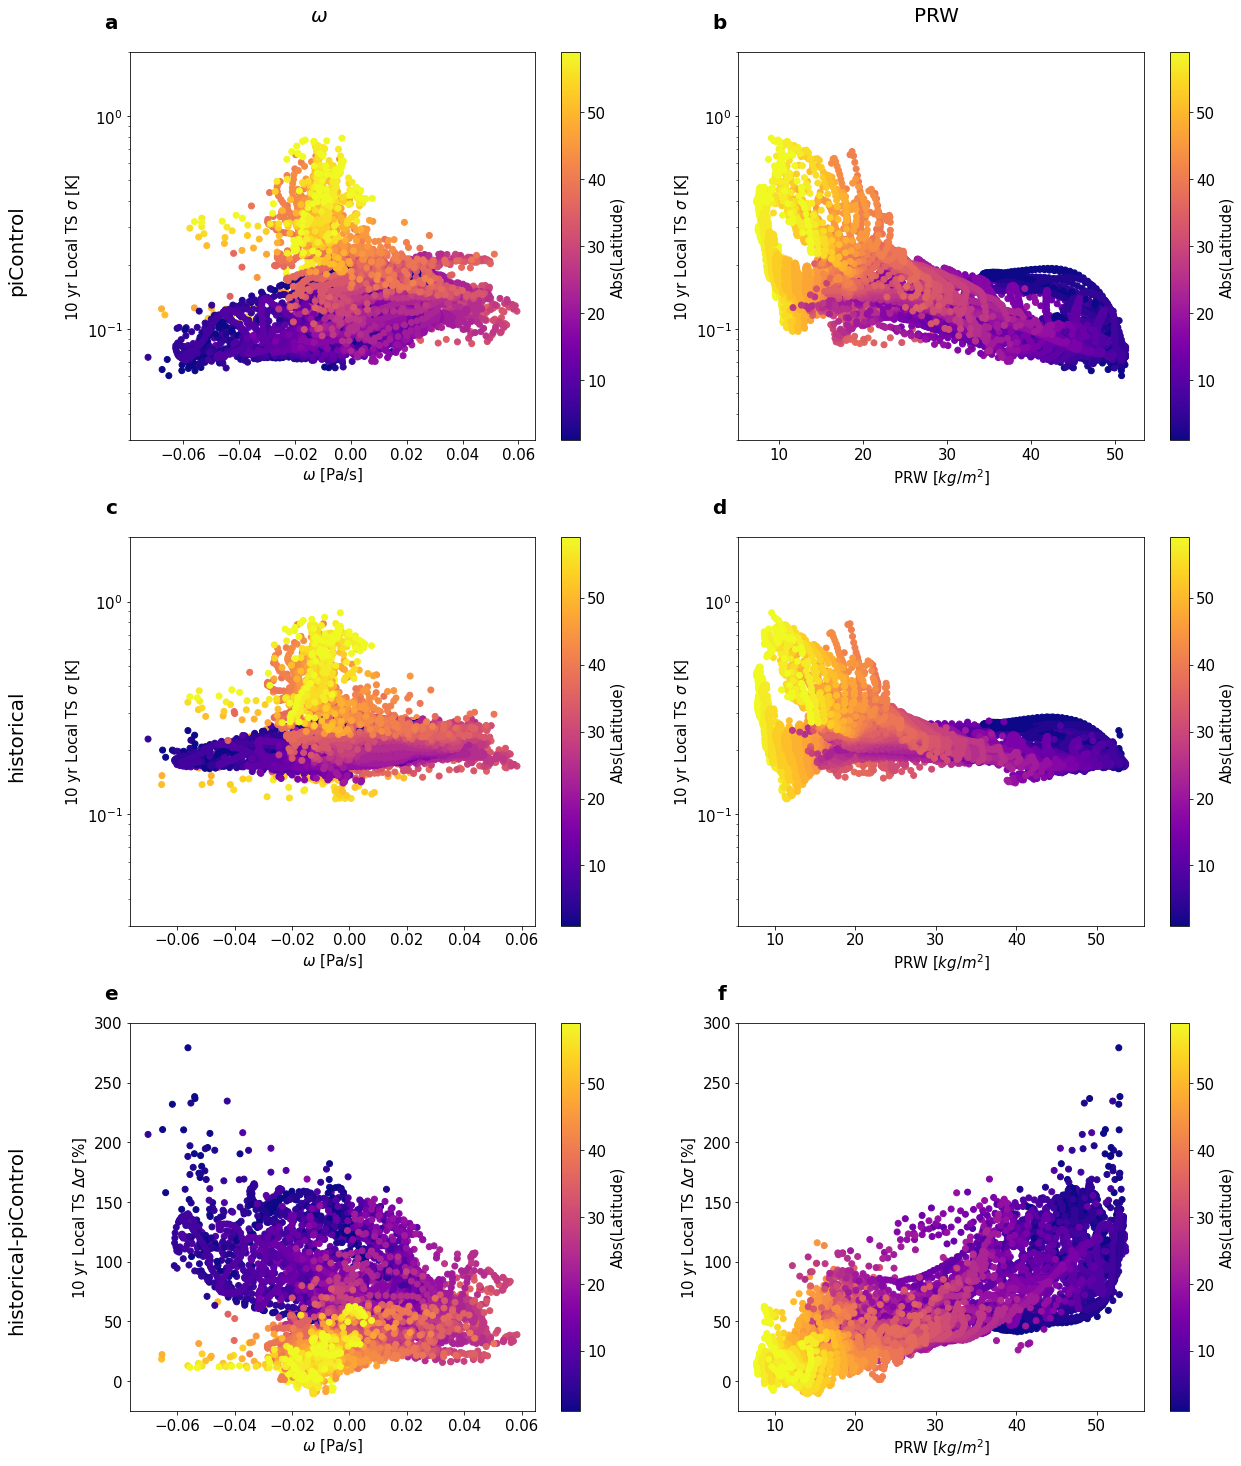

In [13]:
colored_lats = []
for latitude in ts_cont_var['lat'].values:
    for i in range(179): #length of longitude
       colored_lats.append(abs(latitude))
print(len(colored_lats))


fig = plt.figure(figsize=(20,25))
gs = gridspec.GridSpec(ncols=2, nrows=3)
gs.update(wspace=0.2,hspace=0.25)
#top=300
#bottom=270
font = {'size'   : 15,
        'weight' : 'normal'}

matplotlib.rc('font', **font)


ax1 = fig.add_subplot(gs[0,0])
scatter_cont_omega = ax1.scatter(omega_cont_trunc,ts_cont_var,c=colored_lats,cmap='plasma')
cbar = plt.colorbar(scatter_cont_omega, ax=ax1)
cbar.ax.set_ylabel('Abs(Latitude)')
#plt.title(r'piControl TS $\sigma$ vs. piControl $\omega$ - (N=33)')
plt.xlabel(r'$\omega$ [Pa/s]')
plt.ylim(0.03, 2)
plt.yscale('log')
plt.ylabel(r'10 yr Local TS $\sigma$ [K]')
ax1.text(-0.03, 1.1, 'a', transform=ax1.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

ax2 = fig.add_subplot(gs[0,1])
scatter_cont_prw = ax2.scatter(prw_cont_trunc,ts_cont_var,c=colored_lats,cmap='plasma')
cbar = plt.colorbar(scatter_cont_prw, ax=ax2)
cbar.ax.set_ylabel('Abs(Latitude)')
#plt.title(r'piControl TS $\sigma$ vs. piControl $\omega$ - (N=33)')
plt.xlabel(r'PRW [$kg/m^2$]')
plt.ylim(0.03, 2)
plt.yscale('log')
plt.ylabel(r'10 yr Local TS $\sigma$ [K]')
ax2.text(-0.03, 1.1, 'b', transform=ax2.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

fig.text(0.04, 0.77, 'piControl', va='center', rotation='vertical', fontsize=20)

ax3 = fig.add_subplot(gs[1,0])
scatter_hist_omega = ax3.scatter(omega_hist_trunc,ts_hist_var,c=colored_lats,cmap='plasma')
cbar = plt.colorbar(scatter_hist_omega, ax=ax3)
cbar.ax.set_ylabel('Abs(Latitude)')
#plt.title(r'piControl TS $\sigma$ vs. piControl $\omega$ - (N=33)')
plt.xlabel(r'$\omega$ [Pa/s]')
plt.ylim(0.03, 2)
plt.yscale('log')
plt.ylabel(r'10 yr Local TS $\sigma$ [K]')
ax3.text(-0.03, 1.1, 'c', transform=ax3.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

ax4 = fig.add_subplot(gs[1,1])
scatter_hist_prw = ax4.scatter(prw_hist_trunc,ts_hist_var,c=colored_lats,cmap='plasma')
cbar = plt.colorbar(scatter_hist_prw, ax=ax4)
cbar.ax.set_ylabel('Abs(Latitude)')
#plt.title(r'piControl TS $\sigma$ vs. piControl $\omega$ - (N=33)')
plt.xlabel(r'PRW [$kg/m^2$]')
plt.ylim(0.03, 2)
plt.yscale('log')
plt.ylabel(r'10 yr Local TS $\sigma$ [K]')
ax4.text(-0.03, 1.1, 'd', transform=ax4.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

fig.text(0.04, 0.5, 'historical', va='center', rotation='vertical', fontsize=20)

ax5 = fig.add_subplot(gs[2,0])
scatter_perc_omega = ax5.scatter(omega_hist_trunc,ts_percent_var,c=colored_lats,cmap='plasma')
cbar = plt.colorbar(scatter_perc_omega, ax=ax5)
cbar.ax.set_ylabel('Abs(Latitude)')
#plt.title(r'piControl TS $\sigma$ vs. piControl $\omega$ - (N=33)')
plt.xlabel(r'$\omega$ [Pa/s]')
plt.ylim(-25,300)
plt.ylabel(r'10 yr Local TS $\Delta \sigma$ [%]')
ax5.text(-0.03, 1.1, 'e', transform=ax5.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

ax6 = fig.add_subplot(gs[2,1])
scatter_perc_omega = ax6.scatter(prw_hist_trunc,ts_percent_var,c=colored_lats,cmap='plasma')
cbar = plt.colorbar(scatter_perc_omega, ax=ax6)
cbar.ax.set_ylabel('Abs(Latitude)')
#plt.title(r'piControl TS $\sigma$ vs. piControl $\omega$ - (N=33)')
plt.xlabel(r'PRW [$kg/m^2$]')
plt.ylim(-25,300)
plt.ylabel(r'10 yr Local TS $\Delta \sigma$ [%]')
ax6.text(-0.03, 1.1, 'f', transform=ax6.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

fig.text(0.04, 0.22, 'historical-piControl', va='center', rotation='vertical', fontsize=20)

fig.text(0.25, 0.9, r'$\omega$', va='center', fontsize=20)
fig.text(0.67, 0.9, 'PRW', va='center', fontsize=20)

# Separate Maps

In [5]:
omega_cont_mask = xr.open_dataarray('../processed_data/paper1/fig_1_omega_cont.nc')
omega_cont_mask.load()
omega_hist_mask = xr.open_dataarray('../processed_data/paper1/fig_1_omega_hist.nc')
omega_hist_mask.load()
omega_cont_mean = xr.open_dataarray('../processed_data/paper1/fig_1_omega_cont_nonmasked.nc')
omega_cont_mean.load()
omega_hist_mean = xr.open_dataarray('../processed_data/paper1/fig_1_omega_hist_nonmasked.nc')
omega_hist_mean.load()

ts_cont_mask = xr.open_dataarray('../processed_data/paper1/fig_1_ts_cont.nc')
ts_cont_mask.load()
ts_hist_mask = xr.open_dataarray('../processed_data/paper1/fig_1_ts_hist.nc')
ts_hist_mask.load()
ts_percent_mask = xr.open_dataarray('../processed_data/paper1/fig_1_ts_percent.nc')
ts_percent_mask.load()

<xarray.DataArray 'ts' (lat: 60, lon: 179)>
array([[15.78632706, 14.80667513, 14.23392781, ..., 16.26468118,
        15.81873138, 16.39210283],
       [17.41942846, 16.87655954, 16.7699054 , ..., 14.04649425,
        14.33612356, 16.48480788],
       [12.93645617, 12.83545673, 13.62521412, ..., 12.09477333,
        10.4270401 , 10.86784568],
       ...,
       [27.9045342 , 27.50553161, 27.77610788, ...,         nan,
                nan,         nan],
       [24.07948458, 24.95640318, 26.24025377, ..., 16.1306152 ,
                nan,         nan],
       [20.61187905, 22.52882392, 24.780279  , ..., 12.70929176,
        15.61778968, 16.063091  ]])
Coordinates:
  * lat      (lat) int64 -59 -57 -55 -53 -51 -49 -47 ... 47 49 51 53 55 57 59
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
    type     |S4 b'land'

In [3]:
tas_cont_var = xr.open_dataarray('../processed_data/paper1/fig_1_tas_cont.nc')
tas_cont_var.load()

tas_hist_var = xr.open_dataarray('../processed_data/paper1/fig_1_tas_hist.nc')
tas_hist_var.load()

tas_percent_var = xr.open_dataarray('../processed_data/paper1/fig_1_tas_percent.nc')
tas_percent_var.load()

<xarray.DataArray 'tas' (lat: 88, lon: 179)>
array([[59.8561784 , 60.52571071, 60.56769251, ..., 59.11811724,
        58.90849119, 58.30658614],
       [54.26782013, 54.17955992, 54.3794395 , ..., 52.537849  ,
        52.67217715, 52.97730224],
       [45.5689923 , 46.88063042, 47.90231159, ..., 44.34159588,
        44.07861142, 44.10756637],
       ...,
       [51.93079391, 49.68183666, 48.23238697, ..., 60.87701483,
        58.09447135, 54.35199563],
       [59.2560722 , 57.85552844, 56.74251925, ..., 64.53434595,
        62.8985629 , 60.10673426],
       [65.61594707, 64.72860037, 64.1558772 , ..., 67.76987547,
        67.03710998, 64.90329795]])
Coordinates:
    height   float64 2.0
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [4]:
cmip6_ts_global_corr_mean = xr.open_dataarray('../processed_data/paper1/fig_1_tscorr.nc')
cmip6_ts_global_corr_mean.load()

<xarray.DataArray (lat: 60, lon: 179)>
array([[0.47060025, 0.47658793, 0.47427238, ..., 0.50197715, 0.49594269,
        0.49112388],
       [0.47641685, 0.48212332, 0.47343975, ..., 0.52463272, 0.51939842,
        0.51236775],
       [0.50545108, 0.5128964 , 0.50354918, ..., 0.51478845, 0.52140291,
        0.5257155 ],
       ...,
       [0.61575948, 0.60781791, 0.59971408, ..., 0.57979173, 0.61531735,
        0.6310492 ],
       [0.59871884, 0.59654955, 0.59173451, ..., 0.55006575, 0.61419635,
        0.61986823],
       [0.57791003, 0.5872645 , 0.58857669, ..., 0.5366219 , 0.56599671,
        0.57601114]])
Coordinates:
  * lat      (lat) int64 -59 -57 -55 -53 -51 -49 -47 ... 47 49 51 53 55 57 59
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [6]:
tas_cont_var = tas_cont_var.sel(lat=slice(-60,60))
tas_hist_var = tas_hist_var.sel(lat=slice(-60,60))
tas_percent_var = tas_percent_var.sel(lat=slice(-60,60))
omega_hist_mean = omega_hist_mean.sel(lat=slice(-60,60))
omega_cont_mean = omega_cont_mean.sel(lat=slice(-60,60))

10740


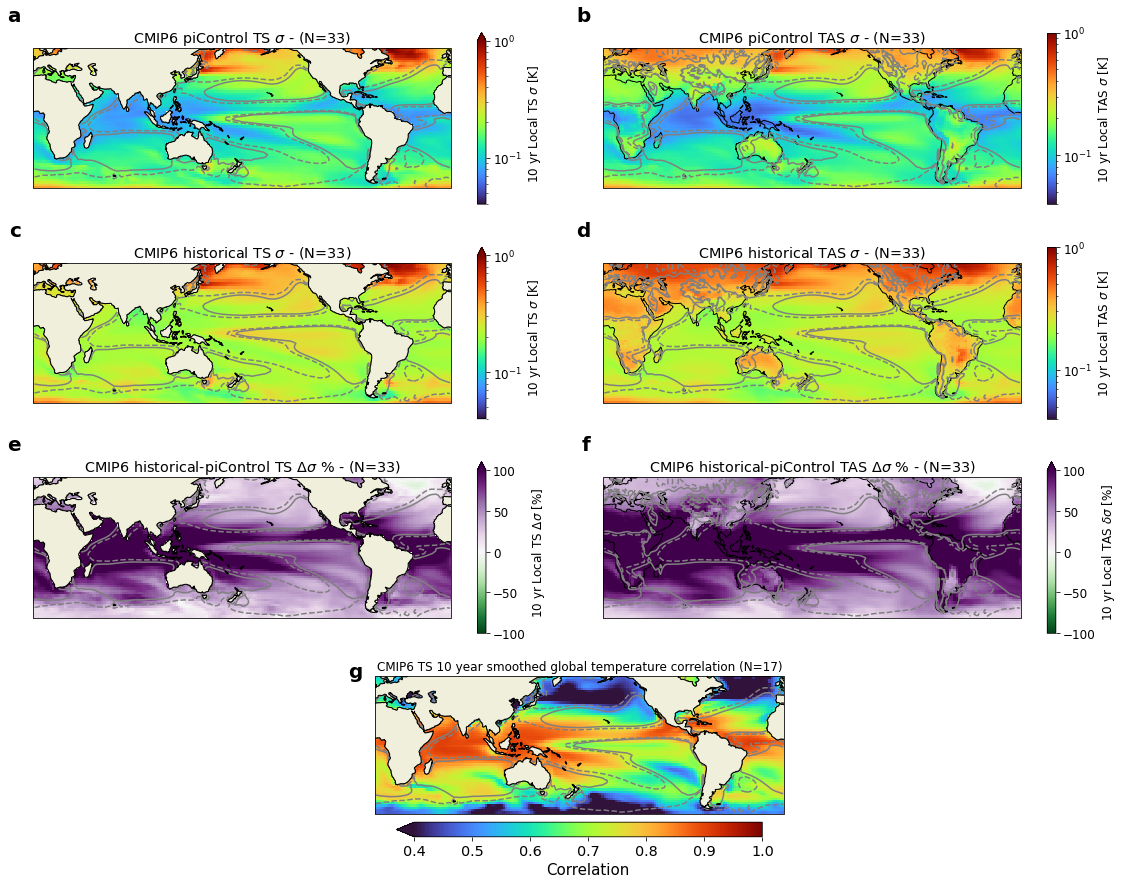

In [15]:
colored_lats = []
for latitude in ts_percent_mask['lat'].values:
    for i in range(179): #length of longitude
       colored_lats.append(abs(latitude))
print(len(colored_lats))


fig = plt.figure(figsize=(40,15))
gs = gridspec.GridSpec(ncols=8, nrows=4)
gs.update(wspace=0.2,hspace=0.25)
#top=300
#bottom=270
font = {'size'   : 12,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

ax1 = fig.add_subplot(gs[0,0:2], projection=ccrs.PlateCarree(central_longitude=180))
# https://stackoverflow.com/questions/36525825/mask-ocean-or-land-from-data-using-cartopy
#ax1.add_feature(cart.feature.LAND, zorder=10, edgecolor='k')
ts_cont_mask.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='turbo', vmin=4*10e-3, vmax=1, 
                   norm=matplotlib.colors.LogNorm(), cbar_kwargs={'label': r"10 yr Local TS $\sigma$ [K]",
                                                                  })
ax1.coastlines(color='black', linewidth=1)
omega_cont_mask.plot.contour(ax=ax1, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax1.text(-0.03, 1.3, 'a', transform=ax1.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
ax1.add_feature(cart.feature.LAND, zorder=2, edgecolor='k')
plt.title(r'CMIP6 piControl TS $\sigma$ - (N=33)')

ax3 = fig.add_subplot(gs[0,2:4], projection=ccrs.PlateCarree(central_longitude=180))
# https://stackoverflow.com/questions/36525825/mask-ocean-or-land-from-data-using-cartopy
#ax3.add_feature(cart.feature.LAND, zorder=10, edgecolor='k')
tas_cont_var.plot(ax=ax3, transform=ccrs.PlateCarree(), cmap='turbo', vmin=4*10e-3, vmax=1, 
                   norm=matplotlib.colors.LogNorm(), cbar_kwargs={'label': r"10 yr Local TAS $\sigma$ [K]",
                                                                  })
ax3.coastlines(color='black', linewidth=1)
omega_cont_mean.plot.contour(ax=ax3, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax3.text(-0.03, 1.3, 'b', transform=ax3.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
plt.title(r'CMIP6 piControl TAS $\sigma$ - (N=33)')

ax5 = fig.add_subplot(gs[1,0:2], projection=ccrs.PlateCarree(central_longitude=180))
ts_hist_mask.plot(ax=ax5, transform=ccrs.PlateCarree(), cmap='turbo', vmin=4*10e-3, vmax=1, 
                   norm=matplotlib.colors.LogNorm(), cbar_kwargs={'label': r"10 yr Local TS $\sigma$ [K]",
                                                                  })
#ax5.add_feature(cart.feature.LAND, zorder=10, edgecolor='k')
ax5.coastlines(color='black', linewidth=1)
omega_hist_mask.plot.contour(ax=ax5, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title(r'CMIP6 historical TS $\sigma$ - (N=33)')
ax5.add_feature(cart.feature.LAND, zorder=2, edgecolor='k')
ax5.text(-0.03, 1.3, 'c', transform=ax5.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

ax7 = fig.add_subplot(gs[1,2:4], projection=ccrs.PlateCarree(central_longitude=180))
tas_hist_var.plot(ax=ax7, transform=ccrs.PlateCarree(), cmap='turbo', vmin=4*10e-3, vmax=1, 
                   norm=matplotlib.colors.LogNorm(), cbar_kwargs={'label': r"10 yr Local TAS $\sigma$ [K]",
                                                                  })
#ax7.add_feature(cart.feature.LAND, zorder=10, edgecolor='k')
ax7.coastlines(color='black', linewidth=1)
omega_hist_mean.plot.contour(ax=ax7, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title(r'CMIP6 historical TAS $\sigma$ - (N=33)')
ax7.text(-0.03, 1.3, 'd', transform=ax7.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

ax9 = fig.add_subplot(gs[2,0:2], projection=ccrs.PlateCarree(central_longitude=180))
ts_percent_mask.plot(ax=ax9, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-100, vmax=100, 
                    cbar_kwargs={'label': r"10 yr Local TS $\Delta \sigma$ [%]",
                                 })
#ax9.add_feature(cart.feature.LAND, zorder=10, edgecolor='k')
ax9.coastlines(color='black', linewidth=1)
omega_hist_mask.plot.contour(ax=ax9, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title(r'CMIP6 historical-piControl TS $\Delta \sigma$ % - (N=33)')
ax9.add_feature(cart.feature.LAND, zorder=2, edgecolor='k')
ax9.text(-0.03, 1.3, 'e', transform=ax9.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

ax11 = fig.add_subplot(gs[2,2:4], projection=ccrs.PlateCarree(central_longitude=180))
tas_percent_var.plot(ax=ax11, transform=ccrs.PlateCarree(), cmap='PRGn_r', vmin=-100, vmax=100,
                     cbar_kwargs={'label': r"10 yr Local TAS $\delta \sigma$ [%]",
                                  })
#ax11.add_feature(cart.feature.LAND, zorder=10, edgecolor='k')
ax11.coastlines(color='black', linewidth=1)
omega_hist_mean.plot.contour(ax=ax11, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title(r'CMIP6 historical-piControl TAS $\Delta \sigma$ % - (N=33)')
ax11.text(-0.03, 1.3, 'f', transform=ax11.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')


ax13 = fig.add_subplot(gs[3,1:3], projection=ccrs.PlateCarree(central_longitude=180))
globb = cmip6_ts_global_corr_mean.plot(ax=ax13, transform=ccrs.PlateCarree(), vmin=0.4, vmax=1, cmap='turbo', 
                                                 add_colorbar=False
                                        #cbar_kwargs={'label': 'Correlation',
                                                #     'orientation': 'horizontal',
                                                #     'shrink': 0.9,
                                                #     'pad': 0.05,
                                                #     'aspect': 25}
                                                )
ax13.coastlines(color='black', linewidth=1)
omega_hist_mean.plot.contour(ax=ax13, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax13.add_feature(cart.feature.LAND, zorder=2, edgecolor='k')
plt.title('CMIP6 TS 10 year smoothed global temperature correlation (N=17)', fontsize=12)                                  
cb = plt.colorbar(globb, orientation="horizontal", pad=0.05, aspect=25, shrink=0.7, extend='min')
ax13.set_extent([0,358,-60,60], crs=ccrs.PlateCarree())
ax13.text(-0.03, 1.1, 'g', transform=ax13.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
cb.set_label(label='Correlation', fontsize=15)
cb.ax.tick_params(labelsize='large')